<a href="https://colab.research.google.com/github/aayushsh2003/ML/blob/main/Exp_10_KNN_Aglo_on_IRIS_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Experiment 10***

Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.



**KNN Algorithm implementation on Iris dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

In [ ]:

# Print the details of the iris dataset
print("Iris data keys:", iris.keys())
print("\nFeature names:", iris.feature_names)
print("\nTarget names:", iris.target_names)

print("\nFirst 5 data points:\n", iris.data[:5])
print("\nTarget values:\n", iris.target)

Iris data keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names: ['setosa' 'versicolor' 'virginica']

First 5 data points:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target values:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Function to find the best k using cross-validation
def find_best_k(X_train, y_train, k_range):
    mean_accuracies = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
        mean_accuracies.append(scores.mean())
    return mean_accuracies

# Determine the best k
k_values = range(1, 21)
mean_accuracies = find_best_k(X_train, y_train, k_values)
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

# Print the best k and its accuracy
print(f"The best value of k is {best_k} with cross-validated accuracy {best_accuracy:.2f}")

# Train the KNN model with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

The best value of k is 3 with cross-validated accuracy 0.95


KNeighborsClassifier(n_neighbors=3)

The best value of k is 3 with cross-validated accuracy 0.95

In [ ]:
# Make predictions on the test data
y_pred = knn_best.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN with k={best_k}: {accuracy:.2f}")


Accuracy of KNN with k=3: 1.00


In [ ]:
# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


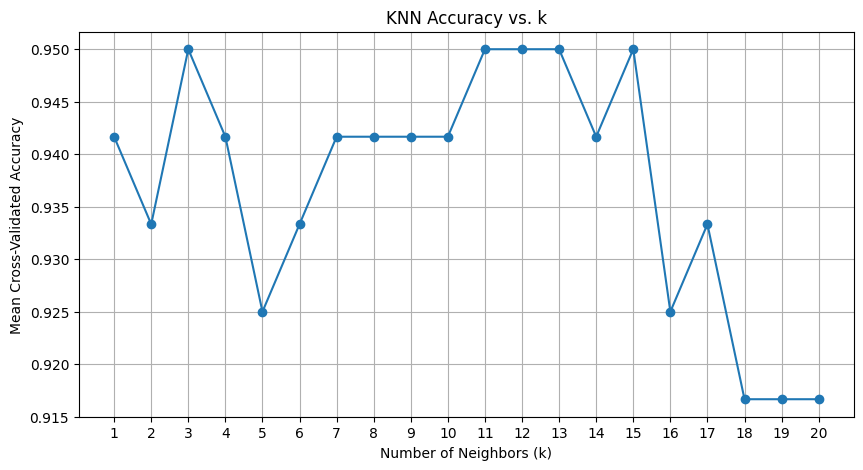

In [ ]:
# Visualize the accuracy for different values of k
plt.figure(figsize=(10, 5))
plt.plot(k_values, mean_accuracies, marker='o')
plt.title('KNN Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

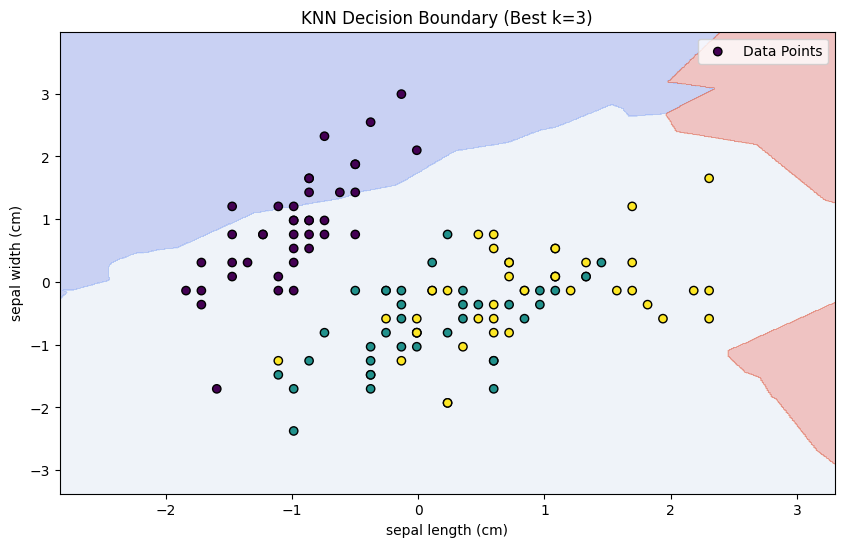

In [ ]:
# Optional: Visualize the decision boundary (for the first two features)
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', label='Data Points')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f"KNN Decision Boundary (Best k={best_k})")
    plt.legend()
    plt.show()

# Plot the decision boundary using the first two features
plot_decision_boundary(X_train[:, :2], y_train, knn_best)